# Preprocessing

Juan Navarro, <jsnavarroa@unal.edu.co>

-------------------------------


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
data_path = os.path.abspath("./data")

## Preprocessing

(507,)
(507,)


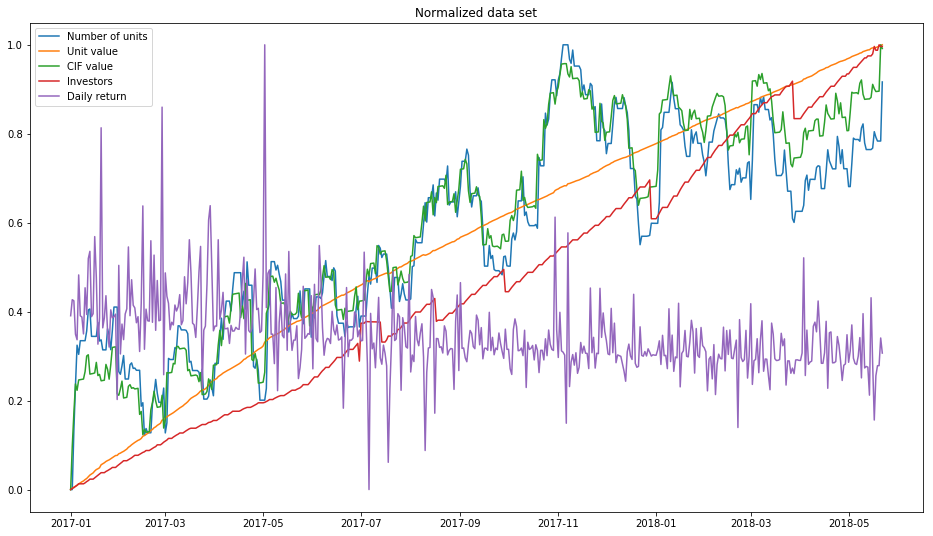

,Fecha corte,Núm. unidades,Valor unidad para las operaciones del día t,Valor fondo al cierre del día t,Núm. Invers.,Rentab. dia
count,507,507.000000,507.000000,507.000000,507.000000,507.000000
unique,507,NaN,NaN,NaN,NaN,NaN
top,2017-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2018-05-22 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.574381,0.559665,0.598151,0.465012,0.346649
std,NaN,0.218027,0.281966,0.243326,0.285473,0.088248
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.392717,0.345872,0.402271,0.203624,0.297929


In [3]:
import pandas as pd
from sklearn import preprocessing

report = pd.read_csv(data_path+"/profitability.csv")

report = report.drop_duplicates()

# Select only FIDUCUENTA
report = report[report['Nombre Negocio'].str.contains("FIDUCUENTA")]

# Drop columns with one value
report = report. drop(columns=['Tipo Entidad', 'Cód. Entidad', 'Nombre Entidad', 'Cód. Negocio', 
                              'Nombre Negocio', 'Subtipo Negocio', 'Subtipo Negocio', 
                              'Tipo Part. <sup>1<sup/>', 'Cons. id Part.', 'Principal / Compart.'], errors='ignore')

# Drop unused columns
report = report. drop(columns=['Rentab. mes', 'Rentab. sem', 'Rentab. año'], errors='ignore')

# Convert dates
report['Fecha corte'] = pd.to_datetime(report['Fecha corte'], format='%d/%m/%Y')
report = report.sort_values(by=['Fecha corte'])
report = report.reset_index(drop=True)

# Convert to numbers
report['Rentab. dia'] = pd.to_numeric(report['Rentab. dia'])

numeric_columns = ['Núm. unidades', 'Valor unidad para las operaciones del día t', 'Valor fondo al cierre del día t']
for c in numeric_columns:
    report[c] = report[c].replace('[\$,]', '', regex=True).astype(float)


# Normalize
x = report['Rentab. dia'].values
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
report.iloc[:, 1:] = scaler.fit_transform(report.iloc[:, 1:])
x_scaled = report['Rentab. dia'].values

print(x.shape)
print(x_scaled.shape)

plt.figure(figsize=(16, 9))
plt.plot(report['Fecha corte'], report['Núm. unidades'], label='Number of units')
plt.plot(report['Fecha corte'], report['Valor unidad para las operaciones del día t'], label='Unit value')
plt.plot(report['Fecha corte'], report['Valor fondo al cierre del día t'], label='CIF value')
plt.plot(report['Fecha corte'], report['Núm. Invers.'], label='Investors')
plt.plot(report['Fecha corte'], report['Rentab. dia'], label='Daily return')
plt.title("Normalized data set")
plt.legend()
plt.savefig('return_normalization.png')
plt.show()

report['Rentab. dia'] = pd.DataFrame(x_scaled)


# Save to file
report.to_csv(data_path+"/data.csv", index=False, encoding="utf-8")


report.describe(include="all")